# The Best Neighborhood in New Jersey for setting up a outpatient physical therapy facility

## 1. Introduction
### 1.1 Business Problem
A friend of mine is thinking of moving to New Jersey to open her physical therapy facility. Both of us met for a drink and she discussed her ideas with me. She has every other thing figured out except the best location (optimal neighborhood) to set up the facility. Her criteria for the optimal neighborhood is as follows:
- Less crime (safe areas)
- Cost of rent
- Close to long-term health care facilities e.g. hospitals, nursing homes, home-care centers, rehabs etc.

This report outlines some basic assumptions, data sets, and analysis that can inform our decision when selecting the optimal neighborhood in New Jersey for setting up a physical therapy facility.

### 1.2 Target audience
The target audience of this report would be anyone who wants to buy or set up a physical therapy business in New Jersey. This report will also be useful for government, hospitals or other health care facilities that are interested in setting up outpatient physical therapy facility.

## 2.0 Data

Making the best decision for the best neighborhood for a physical therapy facility is not a trivial process because several factors have to be considered such as the closeness to long-term health care facilities, areas with low crime rate and cost of rent. To be able to make the best decision, data is needed. Fortunately, New Jersey has several public databases that describes various aspects of the state and Foursquare API allows free access to some of its venue and location data. We will use four sets of data for our analysis. They are:
1. New Jersey Health care facilities data
2. New Jersey Crime Data
3. New Jersey average rent data
4. Foursquare data

In [5]:
import pandas as pd

health = pd.read_csv('Health%20care%20data.csv')
#health.head()
health = health.drop(['LIC#', 'FAC_ADDR_2','FAC_ST','ZIP','ADMIN','OWNADDR','LICENSED_OWNER','owncsz','Lic_Expires','OwnDesc','RunDate'], axis=1)

In [6]:
health = health.drop(['ALPHA_NAME', 'CSZ','TELEPHONE','FAXPHONE','FACEMAIL'], axis=1)
print(health.shape)
health.head()

(859, 9)


,FACILITY_TYPE,FACID,LICENSED_NAME,ADDRESS,FAC_CITY,COUNTY,Lic_Beds_Slots,LAT,LNG
0,ADULT DAY HEALTH CARE SERVICES,NJ80770,1st Cerebral Palsy of New Jersey,7 SANFORD AVENUE,BELLEVILLE,ESSEX,27,40.341649,-74.462594
1,ADULT DAY HEALTH CARE SERVICES,NJ708112,2nd Home Adult Medical Day Care,100 HAMILTON PLAZA GROUND FLOOR,PATERSON,PASSAIC,120,40.916300,-74.172438
2,ADULT DAY HEALTH CARE SERVICES,NJ308113,2nd Home East Orange,115 EVERGREEN PLACE,EAST ORANGE,ESSEX,150,40.762161,-74.222470
3,ADULT DAY HEALTH CARE SERVICES,NJ308116,"2nd Home Newark Operations, LLC",717-727 BROADWAY,NEWARK,ESSEX,240,40.774457,-74.159509
4,ADULT DAY HEALTH CARE SERVICES,NJ308117,"2nd Home Orange Operations, LLC",37 NORTH DAY STREET,ORANGE,ESSEX,110,40.773370,-74.228835


In [7]:
health['FAC_CITY'].value_counts()

TOMS RIVER      17
EDISON          17
WAYNE           14
VOORHEES        14
NEWARK          14
                ..
CRANBURY         1
MIDLAND PARK     1
MARLBORO         1
SOUTH RIVER      1
CINNAMINSON      1
Name: FAC_CITY, Length: 283, dtype: int64

In [8]:
health['FACILITY_TYPE'].value_counts()

LONG TERM CARE FACILITY               365
ASSISTED LIVING RESIDENCE             221
ADULT DAY HEALTH CARE SERVICES        165
COMPREHENSIVE PERSONAL CARE HOME       31
RESIDENTIAL DEMENTIA CARE HOME         28
PEDIATRIC DAY HEALTH CARE SERVICES     17
ASSISTED LIVING PROGRAM                15
RESIDENTIAL HEALTH CARE                13
ADULT FAMILY CARE                       4
Name: FACILITY_TYPE, dtype: int64

In [9]:
health1 = health[['FAC_CITY','LAT']]
grouped_city = health1.groupby(['FAC_CITY'],as_index=False).count()
#grouped_city.head(10)
grouped_city.rename(columns={'FAC_CITY': 'City','LAT': 'Num_of_facility'}, inplace=True)
grouped = grouped_city.sort_values(by = 'Num_of_facility', ascending=False).reset_index()
grouped = grouped.drop(['index'],axis = 1)
health2 = grouped.head(10)

In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


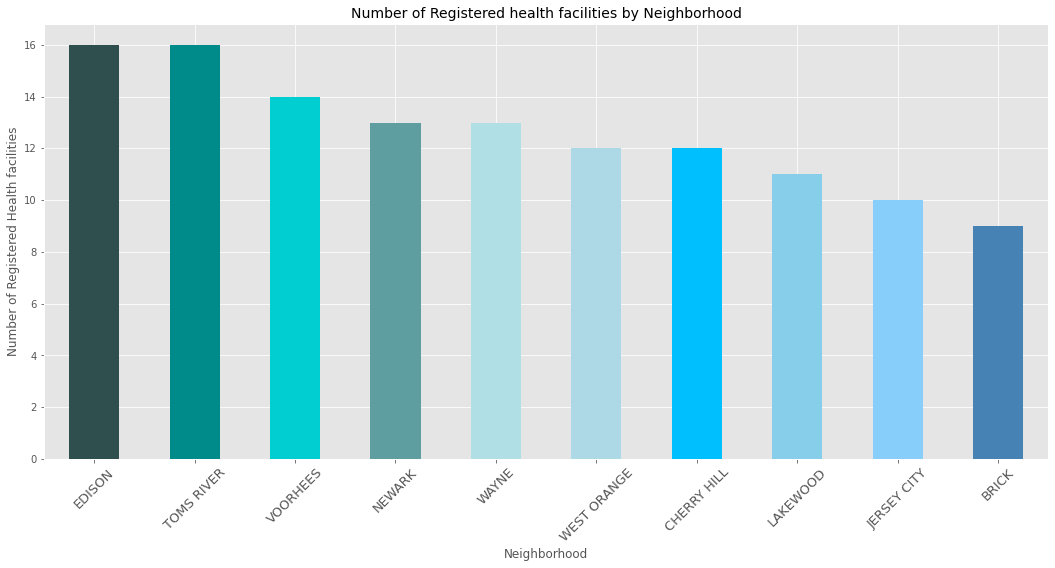

In [11]:
health2.plot.bar(x = 'City', y = 'Num_of_facility', title = "Number of Registered health facilities by Neighborhood", legend = None, rot= 45, figsize = (18, 8),color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Health facilities', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered health facilities by Neighborhood', fontsize = 14)
plt.show()

In [13]:
rent = pd.read_csv('rent_prices.csv')
#print(rent.shape)
rent['Average rent'] = rent['Average rent'].str.replace(r'\D', '').astype(float)
rent['City'] = rent['City'].str.upper()
rent['City'] = rent['City'].map(lambda x: str(x)[:-4])
rent = rent.sort_values(by = 'Average rent', ascending=True)
rent1 = rent.head(10)
#rent.dtypes

In [14]:
rent.tail(10)

,City,Average rent,Percentage increase
45,PRINCETON,2338.0,0.00%
12,ENGLEWOOD,2347.0,0.10%
54,WEST NEW YORK,2410.0,0.10%
47,SECAUCUS,2495.0,0.10%
15,FORT LEE,2596.0,0.50%
24,JERSEY CITY,2942.0,0.50%
53,WEEHAWKEN,3011.0,0.30%
9,EDGEWATER,3202.0,1.10%
21,HOBOKEN,3529.0,0.30%
57,,NaN,NaN


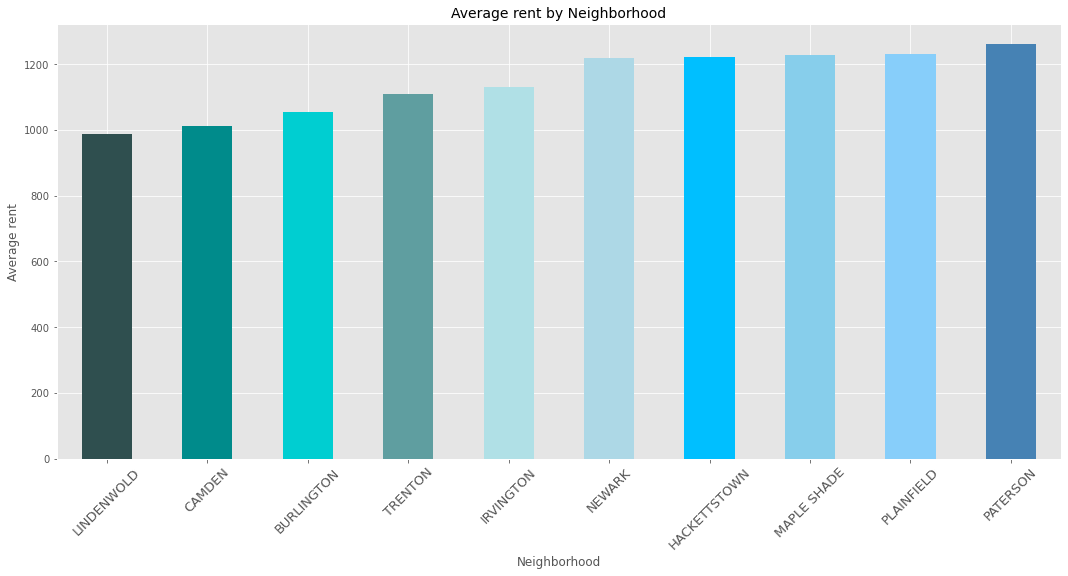

In [15]:
rent1.plot.bar(x = 'City', y = 'Average rent', title = "Average rent by Neighborhood", legend = None, rot= 45, figsize = (18, 8),color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Average rent', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Average rent by Neighborhood', fontsize = 14)
plt.show()

In [17]:
crime = pd.read_csv('Crime-rate.csv')
#crime.head(10)
crime = crime.drop(['NJ','Population','Violent','Law enforcement per 1,000','Property','Law enforcement','Crime rate per 1,000', 'Violent crimes per 1,000','Property crimes per 1,000'], axis=1)
crime = crime.drop([0])
crime = crime.sort_values(by = 'Total crimes', ascending=True).reset_index()
crime = crime.drop(['index'],axis = 1)
crime['City'] = crime['City'].str.upper() 
print('The total number of crime is ',crime['Total crimes'].sum())
crime1 = crime.head(10)

The total number of crime is  118109.0


In [18]:
crime.tail(10)

,City,Total crimes
221,PASSAIC,1704.0
222,"HAMILTON TOWNSHIP, MERCER COUNTY",1816.0
223,CHERRY HILL TOWNSHIP,2118.0
224,VINELAND,2279.0
225,CAMDEN COUNTY POLICE DEPARTMENT,3417.0
226,TRENTON,3440.0
227,PATERSON,4640.0
228,ELIZABETH,4899.0
229,JERSEY CITY,6014.0
230,NEWARK,7743.0


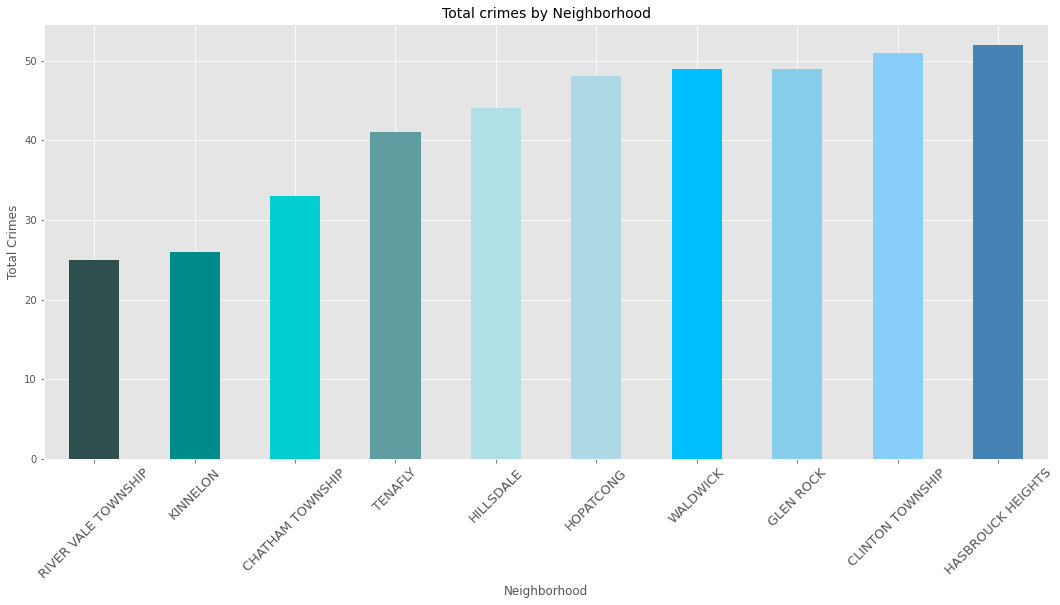

In [19]:
crime1.plot.bar(x = 'City', y = 'Total crimes', title = "Total crimes by Neighborhood", legend = None, rot= 45, figsize = (18, 8),color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Total crimes by Neighborhood', fontsize = 14)
plt.show()

In [20]:
int_df = pd.merge(grouped,crime, how ='inner', on =['City', 'City']).head(20)
crimehealth = int_df.sort_values(by = 'Total crimes', ascending=True)
crimehealth.head(10)

,City,Num_of_facility,Total crimes
14,FLORHAM PARK,5,68.0
11,TINTON FALLS,6,187.0
16,MORRISTOWN,4,232.0
13,PRINCETON,5,235.0
19,PHILLIPSBURG,4,339.0
8,GALLOWAY TOWNSHIP,7,472.0
12,MONTCLAIR,5,539.0
1,WEST ORANGE,12,706.0
17,PERTH AMBOY,4,886.0
15,BAYONNE,4,887.0


In [21]:
#rent = rent.drop(['Percentage increase'],axis = 1)
int_df1 = pd.merge(crimehealth,rent, how ='inner', on =['City', 'City']).head(10)
crimehealthrent = int_df1.sort_values(by = 'Total crimes', ascending=True)
crimehealthrent.head(10)

,City,Num_of_facility,Total crimes,Average rent,Percentage increase
0,MORRISTOWN,4,232.0,2256.0,0.20%
1,PRINCETON,5,235.0,2338.0,0.00%
2,WEST ORANGE,12,706.0,1876.0,0.30%
3,PERTH AMBOY,4,886.0,1604.0,0.10%
4,BAYONNE,4,887.0,1966.0,0.20%
5,PLAINFIELD,4,1015.0,1232.0,0.90%
6,EAST ORANGE,7,1237.0,1295.0,0.20%
7,PASSAIC,6,1704.0,1389.0,0.80%
8,TRENTON,8,3440.0,1108.0,0.30%
9,PATERSON,7,4640.0,1260.0,0.40%


In [22]:
df = crimehealthrent.head(10).iloc[2:6]
df

,City,Num_of_facility,Total crimes,Average rent,Percentage increase
2,WEST ORANGE,12,706.0,1876.0,0.30%
3,PERTH AMBOY,4,886.0,1604.0,0.10%
4,BAYONNE,4,887.0,1966.0,0.20%
5,PLAINFIELD,4,1015.0,1232.0,0.90%


In [23]:
df = df.drop(['Percentage increase'],axis = 1)
df

,City,Num_of_facility,Total crimes,Average rent
2,WEST ORANGE,12,706.0,1876.0
3,PERTH AMBOY,4,886.0,1604.0
4,BAYONNE,4,887.0,1966.0
5,PLAINFIELD,4,1015.0,1232.0


In [24]:
df['Longitude'] = [-74.2391,-74.2654,-74.1143,-74.4074]
df['Latitude'] = [40.7986,40.5068,40.6687,40.6337]

In [27]:
df.head()

,City,Num_of_facility,Total crimes,Average rent,Longitude,Latitude
2,WEST ORANGE,12,706.0,1876.0,-74.2391,40.7986
3,PERTH AMBOY,4,886.0,1604.0,-74.2654,40.5068
4,BAYONNE,4,887.0,1966.0,-74.1143,40.6687
5,PLAINFIELD,4,1015.0,1232.0,-74.4074,40.6337


In [78]:
#!pip uninstall -y numpy
#!pip uninstall -y setuptools
#!pip install setuptools
#!pip install numpy
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install lxml html5lib beautifulsoup4

print('Libraries imported.')

     |████████████████████████████████| 112 kB 3.1 MB/s eta 0:00:01
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Foursquare Data Analysis
### Let's write a function to search the most popular venues within a .5 mile radius of our neighborhoods.

In [117]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [118]:
CLIENT_ID = 'BCQXA4RSNXU1K5NUAN05AGFHPCPAI1G4S5YCFC3RIKFYSSIX' # your Foursquare ID
CLIENT_SECRET = 'H01UAOIYQ3PXQAZ2XCHKNTCNAZKXFFXDF5YWGTTMIEQWSJME' # your Foursquare Secret
ACCESS_TOKEN = 'TQUAXAKCLONONBLMLJDEN4WW2STGANEH4CUAMIXJBUYNKBUM' # your FourSquare Access Token
VERSION = '20200324'
LIMIT =30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: BCQXA4RSNXU1K5NUAN05AGFHPCPAI1G4S5YCFC3RIKFYSSIX
CLIENT_SECRET:H01UAOIYQ3PXQAZ2XCHKNTCNAZKXFFXDF5YWGTTMIEQWSJME


In [119]:
NJ_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

WEST ORANGE
PERTH AMBOY
BAYONNE
PLAINFIELD


In [120]:
#Let's see the shape of our dataframe
print(NJ_venues.shape)
NJ_venues.head()

(84, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,WEST ORANGE,40.7986,-74.2391,Eagle Rock Reservation,40.803330,-74.238363,Park
1,WEST ORANGE,40.7986,-74.2391,Highlawn Pavilion,40.804076,-74.237740,American Restaurant
2,WEST ORANGE,40.7986,-74.2391,Chit Chat Diner,40.802310,-74.245040,Diner
3,WEST ORANGE,40.7986,-74.2391,"""Remembrance and Rebirth"" The Essex County Sep...",40.803011,-74.238210,Scenic Lookout
4,WEST ORANGE,40.7986,-74.2391,Oak Barrel,40.793225,-74.233127,Bar


In [121]:
#take a look at how many venues were pulled for each neighborhood
NJ_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
BAYONNE,30,30,30,30,30,30
PERTH AMBOY,30,30,30,30,30,30
PLAINFIELD,17,17,17,17,17,17
WEST ORANGE,7,7,7,7,7,7


In [122]:
#the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(NJ_venues['Venue Category'].unique())))

There are 52 uniques categories.


### what are the most common venue categories in our 4 selected cities?

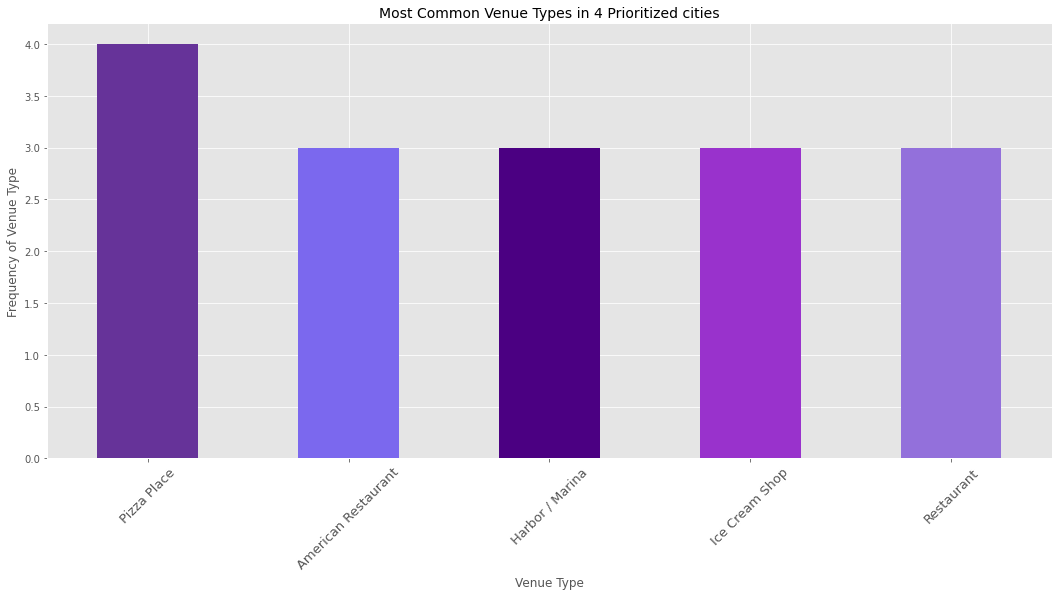

In [123]:
NJ_top_venues = NJ_venues.groupby('Venue Category', as_index = False).count().sort_values('City', ascending = False).head(5)
NJ_top_venues = NJ_top_venues[['Venue Category','City']]
NJ_top_venues.rename(columns={'City': 'Frequency'}, inplace = True)
NJ_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 4 prioritized cities", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 4 Prioritized cities', fontsize = 14)
plt.show()

It looks like Pizza place are the most common venue type, followed by some restaurants, Harbor and Ice cream shop.
Let's do some one hot encoding to further analyze our results.

In [124]:
# one hot encoding
NJ_onehot = pd.get_dummies(NJ_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NJ_onehot['City'] = NJ_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [NJ_onehot.columns[-1]] + list(NJ_onehot.columns[:-1])
NJ_onehot = NJ_onehot[fixed_columns]

NJ_onehot.head()

,City,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bus Stop,Caribbean Restaurant,Chinese Restaurant,Convenience Store,Deli / Bodega,Diner,Discount Store,Doctor's Office,Donut Shop,Farmers Market,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Ice Cream Shop,Irish Pub,Italian Restaurant,Kids Store,Liquor Store,Mobile Phone Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Spa,Spanish Restaurant,Taco Place,Thai Restaurant,Train Station,Video Store
0,WEST ORANGE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,WEST ORANGE,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,WEST ORANGE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,WEST ORANGE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,WEST ORANGE,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
#examine shape of new dataframe
NJ_onehot.shape

(84, 53)

In [126]:
#now group the data
NJ_grouped = NJ_onehot.groupby('City').mean().reset_index()
print(NJ_grouped.shape)
NJ_grouped

(4, 53)


,City,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bus Stop,Caribbean Restaurant,Chinese Restaurant,Convenience Store,Deli / Bodega,Diner,Discount Store,Doctor's Office,Donut Shop,Farmers Market,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Ice Cream Shop,Irish Pub,Italian Restaurant,Kids Store,Liquor Store,Mobile Phone Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Spa,Spanish Restaurant,Taco Place,Thai Restaurant,Train Station,Video Store
0,BAYONNE,0.066667,0.033333,0.066667,0.066667,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.0,0.066667,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.066667,0.033333,0.033333,0.000000,0.000000
1,PERTH AMBOY,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.033333,0.000000,0.1,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.066667,0.033333,0.066667,0.033333,0.033333,0.033333,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000
2,PLAINFIELD,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.117647,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824
3,WEST ORANGE,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [127]:
#print each city with the top 5 most common venues
num_top_venues = 3

for hood in NJ_grouped['City']:
    print("----"+hood+"----")
    temp = NJ_grouped[NJ_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BAYONNE----
                 venue  freq
0  American Restaurant  0.07
1           Bagel Shop  0.07
2               Bakery  0.07


----PERTH AMBOY----
             venue  freq
0  Harbor / Marina  0.10
1    Grocery Store  0.07
2      Pizza Place  0.07


----PLAINFIELD----
                  venue  freq
0          Liquor Store  0.12
1  Fast Food Restaurant  0.12
2     Convenience Store  0.06


----WEST ORANGE----
                 venue  freq
0  American Restaurant  0.14
1                  Bar  0.14
2        Bowling Alley  0.14




In [128]:
#Now we can place our data into a dataframe of the most popular venues for each neighborhood.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [129]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = NJ_grouped['City']

for ind in np.arange(NJ_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NJ_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BAYONNE,American Restaurant,Spanish Restaurant,Bagel Shop,Ice Cream Shop,Bakery,Pizza Place,Pet Store,Diner,Deli / Bodega,Greek Restaurant
1,PERTH AMBOY,Harbor / Marina,Grocery Store,Seafood Restaurant,Restaurant,Pizza Place,Park,Chinese Restaurant,Caribbean Restaurant,Train Station,Gym
2,PLAINFIELD,Fast Food Restaurant,Liquor Store,Video Store,Bus Stop,Train Station,Fried Chicken Joint,Gym / Fitness Center,Farmers Market,Deli / Bodega,Convenience Store
3,WEST ORANGE,American Restaurant,Bar,Scenic Lookout,Doctor's Office,Bowling Alley,Diner,Park,Convenience Store,Furniture / Home Store,Fried Chicken Joint


# Clustering
### Let's use K means clustering to cluster our neighborhoods for more insights!

In [130]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 


In [131]:


# set number of clusters
kclusters = 3

NJ_grouped_clustering = NJ_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NJ_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 2], dtype=int32)

In [132]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NJ_merged = df

In [133]:
# merge SF_grouped with SF_data to add latitude/longitude for each neighborhood
NJ_merged = NJ_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

In [134]:
#also including the number of Gyms that each neighborhood has in its top 10 most popular spots.
NJ_merged["Gym/Fitness Center"] = ""
NJ_merged.loc[NJ_merged.City == 'BAYONNE', 'Gym/Fitness Center'] = .37
NJ_merged.loc[NJ_merged.City == 'PERTH AMBOY', 'Gym/Fitness Center'] = .6
NJ_merged.loc[NJ_merged.City == 'PLAINFIELD', 'Gym/Fitness Center'] = .67
NJ_merged.loc[NJ_merged.City == 'WEST ORANGE', 'Gym/Fitness Center'] = .37
NJ_merged['Gym/Fitness Center'].astype(int)

2    0
3    0
4    0
5    0
Name: Gym/Fitness Center, dtype: int64

In [135]:
NJ_merged['Latitude'] = NJ_merged['Latitude'].astype(float)
NJ_merged['Longitude'] = NJ_merged['Longitude'].astype(float)
NJ_merged['Cluster Labels'] = NJ_merged['Cluster Labels'].astype(int)

NJ_merged

,City,Num_of_facility,Total crimes,Average rent,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Gym/Fitness Center
2,WEST ORANGE,12,706.0,1876.0,-74.2391,40.7986,2,American Restaurant,Bar,Scenic Lookout,Doctor's Office,Bowling Alley,Diner,Park,Convenience Store,Furniture / Home Store,Fried Chicken Joint,0.37
3,PERTH AMBOY,4,886.0,1604.0,-74.2654,40.5068,0,Harbor / Marina,Grocery Store,Seafood Restaurant,Restaurant,Pizza Place,Park,Chinese Restaurant,Caribbean Restaurant,Train Station,Gym,0.6
4,BAYONNE,4,887.0,1966.0,-74.1143,40.6687,0,American Restaurant,Spanish Restaurant,Bagel Shop,Ice Cream Shop,Bakery,Pizza Place,Pet Store,Diner,Deli / Bodega,Greek Restaurant,0.37
5,PLAINFIELD,4,1015.0,1232.0,-74.4074,40.6337,1,Fast Food Restaurant,Liquor Store,Video Store,Bus Stop,Train Station,Fried Chicken Joint,Gym / Fitness Center,Farmers Market,Deli / Bodega,Convenience Store,0.67


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-136-fbb977f14e49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NJ_rb.sort_values('Frequency', inplace = True, ascending = False)


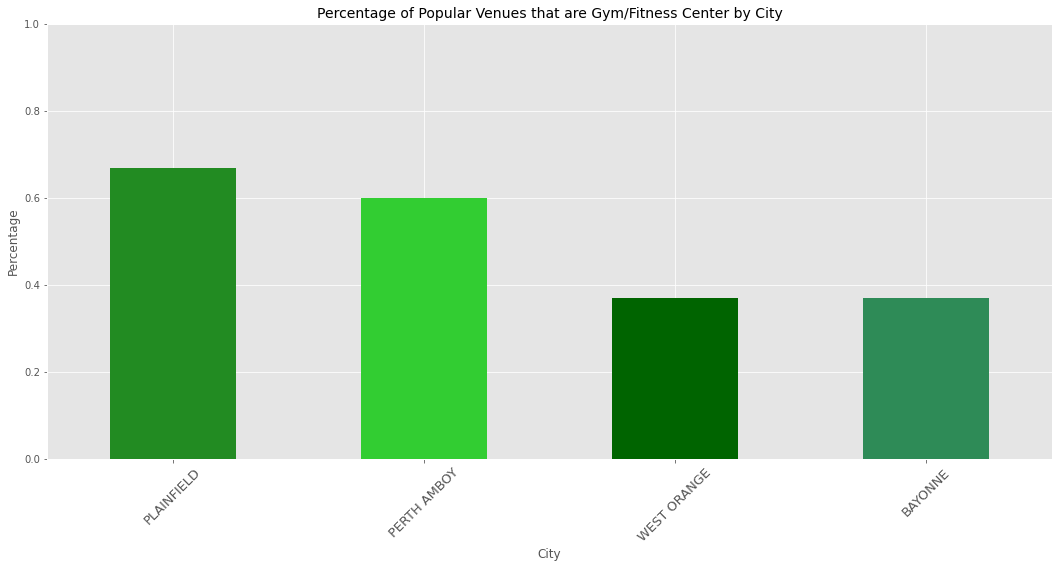

In [136]:
NJ_rb = NJ_merged[['City','Gym/Fitness Center']]
NJ_rb.rename(columns={'Gym/Fitness Center': 'Frequency'}, inplace = True)
NJ_rb.sort_values('Frequency', inplace = True, ascending = False)
NJ_rb.plot.bar(x='City',y ='Frequency', rot = 45, figsize = (18, 8), legend = None, color = ['forestgreen','limegreen','darkgreen','seagreen','green','mediumseagreen'])
plt.ylabel('Percentage', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('City', fontsize=12)
plt.ylim(0,1)
plt.title('Percentage of Popular Venues that are Gym/Fitness Center by City', fontsize = 14)
plt.show()

## Map Clustered Neighborhoods
#### Next, let's pull the coordinates for New Jersey and build a map.

In [137]:
address = 'New Jersey'

geolocator = Nominatim(user_agent="NJ_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Jersey are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Jersey are 40.0757384, -74.4041622.


Finally, let's map our clustered neighborhoods to see which ones are more similar.

In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.7, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
markers_colors = []
for lat, lon, poi, cluster, bars in zip(NJ_merged['Latitude'], NJ_merged['Longitude'], NJ_merged['City'], NJ_merged['Cluster Labels'], NJ_merged['Gym/Fitness Center']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=35*bars,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 4.0 Results and Discussion

We have pulled data on crime rate, rent prices and the number of health care facilities for every city in New Jersey and use this information to narrow down our city options to 4 cities. Our analysis has informed us that:
Pizza place, restaurants, Harbor/Marina and ice cream shops are the most common popular venue type in our 4 preferred cities.
Clustering cities based on their most popular venues grouped Bayonne and Perth Amboy into one cluster, plainfield and west orange stand as an independent cluster.
From the rent dataset, plainfield has the cheapest rent while from the crime dataset, west orange has the least number of crimes.

Based on this analysis, the optimal location is west orange since it has the least number of crimes and the highest number of health care facilities around.
A major drawback of this analysis is that the clustering was based on Foursquare’ s data for popular venues. There are plenty other ways to assess popularity of cities and the spots inside them, venue popularity is just one of them.

## 5.0 Conclusion
In this report, we did an end to end data science project using python libraries to manipulate datasets. We use the Foursquare API to explore the cities in New Jersey and Folium map to cluster and segment cities. This analytical tool will help my friend to make the right decision on where to open her physical therapy facility in New Jersey.